<h1 align="center"> Predicting the Next Crypto Coin/Token Star Using Machine Learning </h1>

<h2 align="center"> Advanced Seminar Information Management </h2>

<h3 align="center"> Supervisor Prof. Dr. Schoder </h3>
  
<h4 align="center"> Pascal Grewe & Andrej Kotsovolos </h4>


<h1>1. Data Collection <h1>

In [1]:
# import free Python Coin Gecko API
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import time

## CoinGecko

### Coin Data

In [2]:
# get date for each row normal datetime format instead of unix in each cell
# start with input date and add one day with each next row 
def add_date(year, month, day, coin):
    size = int(coin.size/4)
    date = datetime(year, month, day)
    
    for i in range(size):
        coin.iloc[i,3] = date 
        date = date + timedelta(1)

In [3]:
# cut unix datetime from each cell
def cut_date(column, dataframe):
    length = (int(dataframe.size/3))
    df = []

    for i in range(length):
        c = (dataframe[column].iloc[i])
        c.remove(c[0])
        df.append(c)
    
    dataframe[column] = pd.DataFrame.from_dict(df)
    return dataframe[column]

In [27]:
# list all your desired coins here
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra-luna", "cardano", "avalanche-2", "stellar", "monero"]

In [28]:
# dataframes for prices, volumnes, marketcaps
prices = pd.DataFrame(columns=["a"])
market_caps = pd.DataFrame(columns=["a"])
total_volumes = pd.DataFrame(columns=["a"])

In [29]:
# get coin data for specific coin from 01-01-2018 00:00:00 to 26-04-2022 00:00:00
# start_date and end_date have to be in UNIX format 
def get_coin_data(name, start_date, end_date):
    coin = cg.get_coin_market_chart_range_by_id(id = name, vs_currency='usd', from_timestamp = start_date, to_timestamp=end_date)
    coin = pd.DataFrame.from_dict(coin)
    
    # cut unix date from dataframe
    cut_date('prices', coin)
    cut_date('market_caps', coin)
    cut_date('total_volumes', coin)
    
    # create new column for date
    coin['date'] = 1 
    # enter start date of data y,m,d
    add_date(2018, 1, 1, coin)
    # set date as index
    coin = coin.set_index(coin['date'])
    #drop date column
    coin = coin.drop('date', 1)
    
    ##########
    prices[name + "_prices"] = coin["prices"]
    market_caps[name + "_market_caps"] = coin["market_caps"]
    total_volumes[name + "_total_volumes"] = coin["total_volumes"]
    ##########
    
    coin.to_csv('./data/coingecko/CoinGecko_'+ name + '.csv', index = True)
    
    return coin

In [30]:
# enter list of coins and get csv of them
def all_coins(names, start_date, end_date):
    for i in names:
        get_coin_data(i, start_date, end_date)
        time.sleep(10) #wait 10 seconds to avoid api time out

In [31]:
# function that reads the csv and sets the index back to date
def read(file_name):
    return pd.read_csv(file_name).set_index('date')

In [33]:
# get all coin data for coins from list for timespan
all_coins(coin_list, '1514761200', '1650924000')

/var/folders/_m/71fq0nk106s02qxvct5s2sv80000gn/T/ipykernel_2733/2373174658.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  coin = coin.drop('date', 1)


In [34]:
# delete empty column
prices = prices.drop(columns=["a"])
total_volumes = total_volumes.drop(columns=["a"])
market_caps = market_caps.drop(columns=["a"])

In [35]:
# export csv
prices.to_csv("./data/coingecko/CoinGecko_prices"+ '.csv',index = True)
total_volumes.to_csv("./data/coingecko/CoinGecko_total_volumes"+ '.csv', index = True)
market_caps.to_csv("./data/coingecko/CoinGecko_market_caps"+ '.csv', index = True)

In [36]:
bitcoin = read('./data/coingecko/CoinGecko_bitcoin.csv')

In [37]:
ethereum = read('./data/coingecko/CoinGecko_ethereum.csv')

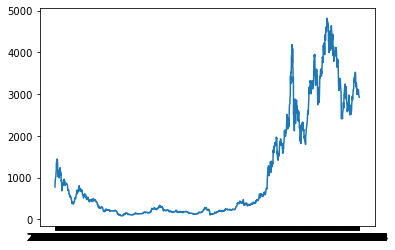

In [38]:
plt.figure()
plt.plot(ethereum['prices'])

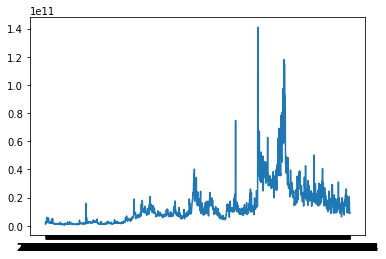

In [39]:
plt.figure()
plt.plot(ethereum['total_volumes'])

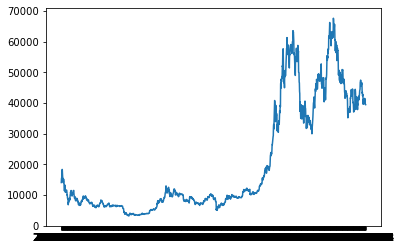

In [40]:
plt.figure()
plt.plot(bitcoin['prices'])

#### OHLC

Open High Low Close (OHLC) Charts zeigen den Eröffnungskurs (Open), den Höchstkurs (High), den tiefsten Kurs (Low) und den Schlusskurs (Close) an.

In [41]:
bitcoin_ohlc = pd.DataFrame.from_dict(cg.get_coin_ohlc_by_id(id = 'bitcoin', vs_currency='usd', days = 'max'))

In [42]:
bitcoin_ohlc

,0,1,2,3,4
0,1367280000000,135.30,141.96,135.30,135.30
1,1367539200000,117.00,117.00,91.01,91.01
2,1367884800000,111.25,118.33,106.40,106.40
3,1368230400000,112.64,118.78,112.64,113.01
4,1368576000000,114.71,117.18,114.16,114.16
...,...,...,...,...,...
863,1653264000000,30382.41,30382.41,29256.81,30351.05
864,1653609600000,29163.17,29655.03,29163.17,29346.78
865,1653955200000,28646.65,31740.94,28646.65,31740.94
866,1654214400000,31865.75,31865.75,29833.45,30481.01


### Asset Platforms

Platform crypto assets could also be called infrastructure blockchains. They are crypto assets which "allow stuff to happen" in the crypto world, the most fundamental enabler of the crypto world.

In [43]:
asset = pd.DataFrame.from_dict(cg.get_asset_platforms())

In [44]:
asset

,id,chain_identifier,name,shortname
0,factom,NaN,Factom,
1,openledger,NaN,OpenLedger,
2,cosmos,NaN,Cosmos,
3,binancecoin,NaN,Binance Coin,
4,metaverse-etp,NaN,Metaverse ETP,
...,...,...,...,...
102,,NaN,CoinEx Smart Chain,CSC
103,,NaN,Everscale,
104,conflux,NaN,Conflux,conflux
105,energi,NaN,Energi,


### Contracts

Token contract adress refers to the address location of the actual token contract that manages the logic for the tokens.

### Categories

In [45]:
categories = pd.DataFrame.from_dict(cg.get_coins_categories())

In [46]:
categories

,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,ethereum-ecosystem,Ethereum Ecosystem,5.077759e+11,3.826881,,[https://assets.coingecko.com/coins/images/279...,7.301739e+10,2022-06-06T14:56:03.419Z
1,smart-contract-platform,Smart Contract Platform,3.906363e+11,6.152757,Smart contract platforms are usually blockchai...,[https://assets.coingecko.com/coins/images/279...,2.581597e+10,2022-06-06T14:55:49.095Z
2,binance-smart-chain,BNB Chain Ecosystem,2.604823e+11,1.416223,BNB Chain is an alternative blockchain that is...,[https://assets.coingecko.com/coins/images/325...,5.189468e+10,2022-06-06T14:56:01.042Z
3,polygon-ecosystem,Polygon Ecosystem,2.441223e+11,1.485332,,[https://assets.coingecko.com/coins/images/325...,4.959907e+10,2022-06-06T14:55:32.488Z
4,avalanche-ecosystem,Avalanche Ecosystem,2.371444e+11,1.459786,None,[https://assets.coingecko.com/coins/images/325...,4.870107e+10,2022-06-06T14:55:19.874Z
...,...,...,...,...,...,...,...,...
73,defi-index,DeFi Index,1.151334e+08,7.535627,None,[https://assets.coingecko.com/coins/images/124...,1.743198e+06,2022-06-06T14:55:00.693Z
74,kardiachain-ecosystem,KardiaChain Ecosystem,7.911091e+07,9.725484,,[https://assets.coingecko.com/coins/images/794...,1.539968e+09,2022-06-06T14:55:54.829Z
75,farming-as-a-service-faas,Farming-as-a-Service (FaaS),2.386807e+07,7.925545,,[https://assets.coingecko.com/coins/images/215...,1.192472e+05,2022-06-06T14:55:58.514Z
76,aave-tokens,Aave Tokens,0.000000e+00,0.000000,None,[https://assets.coingecko.com/coins/images/116...,5.456977e+04,2022-06-06T14:55:45.450Z


In [47]:
categories_list = pd.DataFrame.from_dict(cg.get_coins_categories_list())

In [48]:
categories_list

,category_id,name
0,aave-tokens,Aave Tokens
1,analytics,Analytics
2,arbitrum-ecosystem,Arbitrum Ecosystem
3,artificial-intelligence,Artificial Intelligence
4,asset-backed-tokens,Asset-backed Tokens
...,...,...
136,xdc-ecosystem,XDC Ecosystem
137,yearn-yfi-partnerships-mergers,Yearn Ecosystem
138,yield-aggregator,Yield Aggregator
139,yield-farming,Yield Farming


### Exchanges
##### Not useful - Exchanges not goal?

information regarding exchanges

### Indexes
##### What are those? Not useful?

market indexes

### Derivatives
##### not useful? not our goal?

The underlying asset in crypto derivatives trading can be any cryptocurrency token. Two parties that enter into a financial contract speculate on the cryptocurrency’s price on a future date. During the first phase of the contract, the sides agree on a selling/buying price for the cryptocurrency on a specific day, regardless of the market price. As a result, investors can profit from changes in the underlying asset’s price by purchasing the currency at a cheaper price and selling it at a higher price.

In [49]:
derivatives = pd.DataFrame.from_dict(cg.get_derivatives())

In [50]:
derivatives

,market,symbol,index_id,price,price_percentage_change_24h,contract_type,index,basis,spread,funding_rate,open_interest,volume_24h,last_traded_at,expired_at
0,Binance (Futures),BTCUSDT,BTC,31562.47,5.689982,perpetual,31500.872049,0.052954,0.01,0.0100,2.941470e+09,1.278060e+10,1654527529,NaN
1,Bitget Futures,BTCUSDT_UMCBL,BTC,31569.66,5.749924,perpetual,31498.648658,0.009997,0.01,-0.0050,2.778936e+09,6.320075e+09,1654527568,NaN
2,Prime XBT,BTC/USD,BTC,31476.3,5.662043,perpetual,NaN,0.000000,0.03,0.0000,2.377854e+09,2.623359e+08,1654527532,NaN
3,FTX (Derivatives),BTC-PERP,BTC,31490.0,5.720808,perpetual,31486.765000,-0.010273,0.02,0.0240,2.138258e+09,2.809913e+09,1654527506,NaN
4,Gate.io (Futures),BTC_USDT,BTC,31541.12,5.604299,perpetual,31501.080000,0.121349,0.01,0.0044,1.695470e+09,6.090589e+08,1654527507,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,FTX (Derivatives),AMC-0624,AMC,12.13,0.000000,futures,12.355000,1.875902,1.43,0.0000,NaN,1.697850e+01,1654522833,1.656101e+09
3128,FTX (Derivatives),GLD-0624,GLD,172.7,0.000000,futures,172.500000,-0.115808,0.10,0.0000,NaN,1.727000e+00,1654524986,1.656101e+09
3129,BitMEX (Derivative),XBTUSDTM22,BXBTT30M,30173.79,0.258075,futures,31509.890000,4.657942,0.35,0.0000,NaN,9.353876e+04,1654467317,1.656072e+09
3130,Bakkt,6754319,BTC,31370.0,0.000000,futures,NaN,0.000000,NaN,0.0000,NaN,6.274000e+04,1654487319,NaN


In [51]:
derivative_exchanges = pd.DataFrame.from_dict(cg.get_derivatives_exchanges())

In [52]:
derivative_exchanges

,name,id,open_interest_btc,trade_volume_24h_btc,number_of_perpetual_pairs,number_of_futures_pairs,image,year_established,country,description,url
0,Binance (Futures),binance_futures,257057.02,1413641.55,209,20,https://assets.coingecko.com/markets/images/46...,2019.0,None,,https://www.binance.com/
1,FTX (Derivatives),ftx,173239.13,225661.67,194,94,https://assets.coingecko.com/markets/images/44...,2019.0,Antigua and Barbuda,,https://ftx.com/
2,BTCEX (Futures),btcex_futures,130809.73,171851.83,56,0,https://assets.coingecko.com/markets/images/75...,NaN,None,,https://www.btcex.com/en-us/
3,Bitget Futures,bitget_futures,129929.42,234375.61,56,0,https://assets.coingecko.com/markets/images/59...,NaN,None,,https://www.bitget.com/en/
4,BTCC Futures,btcc_futures,122129.67,158790.9,10,20,https://assets.coingecko.com/markets/images/84...,2011.0,None,,https://www.btcc.com/en-US/trade/
5,C-Trade,c_trade,121894.38,432.54,6,0,https://assets.coingecko.com/markets/images/61...,2019.0,British Virgin Islands,C-Trade is a next-generation cryptocurrency de...,https://www.c-trade.com
6,AAX Futures,aax_futures,106569.35,69459.78,54,0,https://assets.coingecko.com/markets/images/58...,2019.0,Malta,AAX is the world’s first cryptocurrency exchan...,https://www.aax.com/
7,MEXC Global (Futures),mxc_futures,98830.91,121358.64,223,0,https://assets.coingecko.com/markets/images/55...,NaN,None,,https://www.mexc.com/
8,OKX (Futures),okex_swap,97681.42,400361.13,170,281,https://assets.coingecko.com/markets/images/37...,NaN,None,,https://www.okx.com/trade-futures
9,Bybit,bybit,90053.90,302973.08,186,0,https://assets.coingecko.com/markets/images/46...,2018.0,None,"Established in March 2018, Bybit is one of the...",https://www.bybit.com


In [53]:
derivative_exchanges_list = pd.DataFrame.from_dict(cg.get_derivatives_exchanges_list())

In [54]:
derivative_exchanges_list

,id,name
0,binance_futures,Binance (Futures)
1,ftx,FTX (Derivatives)
2,btcex_futures,BTCEX (Futures)
3,bitget_futures,Bitget Futures
4,btcc_futures,BTCC Futures
...,...,...
61,perpetual_protocol,Perpetual Protocol
62,powertrade_derivatives,Powertrade (Derivatives)
63,basefex,BaseFEX
64,acdx_futures,ACDX Futures


In [55]:
derivative_exchange_id = cg.get_derivatives_exchanges_by_id(id='binance_futures')

In [56]:
derivative_exchange_id

{'name': 'Binance (Futures)',
 'open_interest_btc': 256608.52,
 'trade_volume_24h_btc': '1419786.14',
 'number_of_perpetual_pairs': 209,
 'number_of_futures_pairs': 20,
 'image': 'https://assets.coingecko.com/markets/images/466/small/binance_futures.jpg?1568609512',
 'year_established': 2019,
 'country': None,
 'description': '',
 'url': 'https://www.binance.com/'}

### Exchange Rates
##### Not useful - BTC exchange rates not useful for project goal?

Get BTC-to-Currency exchange rates

### CoinGecko Trending Searches
##### Not useful - non historic?

Top 7 in the last 24 hours

### Global data
##### Not useful?

### Company
##### Not useful - only BTC and ETH?

Get public companies bitcoin or ethereum holdings (Ordered by total holdings descending)<br>
Only works for Ethereum and Bitcoin

# Santiment

## ! Santiment is also a Token Network - Mention in paper possibility of bias

In [57]:
import san
san.ApiConfig.api_key = '3upvxk7v73tdbsye_sda5brzu6hdnuren'

In [58]:
metrics = pd.DataFrame.from_dict(san.available_metrics())

In [59]:
metrics

,0
0,_transform_arg_helper
1,average_token_age_consumed_in_days
2,burn_rate
3,daily_active_deposits
4,emerging_trends
...,...
885,dev_activity
886,dev_activity_contributors_count
887,github_activity
888,github_activity_contributors_count


In [60]:
# dateformat "2018-06-01"
# function to get all coin price stats from santiment
def santiment_prices(coin_list, startdate, enddate):
    
    # create dataframe
    santiment_prices = pd.DataFrame(columns=["a"])
    santiment_marketcap = pd.DataFrame(columns=["a"])
    santiment_volumes = pd.DataFrame(columns=["a"])
    
    #api call for every coin in list
    for i in coin_list:
        a = san.get(
            "prices/"+i,
            from_date=startdate,
            to_date=enddate,
            interval="1d"
        )
        
        # create dataframe
        a = pd.DataFrame.from_dict(a)
    
        # create new column for date
        #a['date'] = 1 
        # enter start date of data y,m,d
        #add_date(2018, 1, 1, a)
        # set date as index
        #a = a.set_index(a['date'])
        #drop date column
        #a = a.drop('date', 1)
        
        # create dataframe for prices, marketcap and volume
        santiment_prices[i + "_prices"] = a["priceUsd"]
        santiment_marketcap[i + "_marketcap"] = a["marketcap"]
        santiment_volumes[i+ "_volumes"] = a["volume"]
        
        # export coin data to csv
        a.to_csv('./data/santiment/prices/santiment_'+ i + '.csv', index = True)
    
    # delete empty column
    santiment_prices = santiment_prices.drop(columns=["a"])
    santiment_marketcap = santiment_marketcap.drop(columns=["a"])
    santiment_volumes = santiment_volumes.drop(columns=["a"])
    
    # export to csv
    santiment_prices.to_csv('./data/santiment/prices/santiment_prices' + '.csv')
    santiment_marketcap.to_csv('./data/santiment/prices/santiment_marketcap' + '.csv')
    santiment_volumes.to_csv('./data/santiment/prices/santiment_volumes' + '.csv')

In [61]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra-luna", "cardano", "avalanche", "stellar", "monero"]

In [62]:
santiment_prices(coin_list, "2018-01-01", "2022-05-31")

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

In [63]:
btc_metrics = pd.DataFrame(san.available_metrics_for_slug('bitcoin'))
stellar_metrics = pd.DataFrame(san.available_metrics_for_slug('terra-luna'))


## Social Metrics

#### Twitter Followers

only for the last year

In [64]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "terra", "cardano", "avalanche", "stellar", "monero"]

In [65]:
def twitter_follower(coin_list):
    
    twitter_follow = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        a = san.get("twitter_followers/" + i)
        a = pd.DataFrame.from_dict(a)
        
        twitter_follow[i] = a['value']
    
    twitter_follow = twitter_follow.drop(columns=["a"])
        
    twitter_follow.to_csv('./data/santiment/social/santiment_twitter_followers' + '.csv')

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

#### Social Dominance

# ! changed name terra to luna - check if same coin

In [69]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "luna", "cardano", "avalanche", "stellar", "monero"]

In [66]:
telegram = san.get("social_dominance_telegram/bitcoin")


In [70]:
def social_dominance(coin_list):
    
    santiment_social_dominance_telegram = pd.DataFrame(columns=["a"])
    santiment_social_dominance_reddit = pd.DataFrame(columns=["a"])
    santiment_social_dominance_total = pd.DataFrame(columns=["a"])

    
    for i in coin_list:
        santiment_social_dominance_telegram[i] = san.get("social_dominance_telegram/" + i)
        santiment_social_dominance_reddit[i] = san.get("social_dominance_reddit/" + i)
        santiment_social_dominance_total[i] = san.get("social_dominance_total/" + i)
        
    santiment_social_dominance_telegram = santiment_social_dominance_telegram.drop(columns=["a"])
    santiment_social_dominance_reddit = santiment_social_dominance_reddit.drop(columns=["a"])
    santiment_social_dominance_total = santiment_social_dominance_total.drop(columns=["a"])
    
    santiment_social_dominance_telegram.to_csv('./data/santiment/social/santiment_social_dominance_telegram' + '.csv')
    santiment_social_dominance_reddit.to_csv('./data/santiment/social/santiment_social_dominance_reddit' + '.csv')
    santiment_social_dominance_total.to_csv('./data/santiment/social/santiment_social_dominance_total' + '.csv')

In [72]:
social_dominance(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

### Social Volume

In [73]:
def social_volume(coin_list):
    
    santiment_social_volume_telegram = pd.DataFrame(columns=["a"])
    santiment_social_volume_reddit = pd.DataFrame(columns=["a"])
    santiment_social_volume_twitter = pd.DataFrame(columns=["a"])
    santiment_social_volume_bitcointalk = pd.DataFrame(columns=["a"])
    santiment_social_volume_total = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        santiment_social_volume_telegram[i] = san.get("social_volume_telegram/" + i)
        santiment_social_volume_reddit[i] = san.get("social_volume_reddit/" + i)
        santiment_social_volume_twitter[i] = san.get("social_volume_twitter/" + i)
        santiment_social_volume_bitcointalk[i] = san.get("social_volume_bitcointalk/" + i)
        santiment_social_volume_total[i] = san.get("social_volume_total/" + i)
        
    santiment_social_volume_telegram = santiment_social_volume_telegram.drop(columns=["a"])
    santiment_social_volume_reddit = santiment_social_volume_reddit.drop(columns=["a"]) 
    santiment_social_volume_twitter = santiment_social_volume_twitter.drop(columns=["a"])
    santiment_social_volume_bitcointalk = santiment_social_volume_bitcointalk.drop(columns=["a"])
    santiment_social_volume_total = santiment_social_volume_total.drop(columns=["a"])

    santiment_social_volume_telegram.to_csv('./data/santiment/social/santiment_social_volume_telegram' + '.csv')
    santiment_social_volume_reddit.to_csv('./data/santiment/social/santiment_social_volume_reddit' + '.csv')
    santiment_social_volume_twitter.to_csv('./data/santiment/social/santiment_social_volume_twitter' + '.csv')
    santiment_social_volume_bitcointalk.to_csv('./data/santiment/social/santiment_social_volume_bitcointalk' + '.csv')
    santiment_social_volume_total.to_csv('./data/santiment/social/santiment_social_volume_total' + '.csv')

In [74]:
social_volume(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

### Sentiment

#### Sentiment Positive

# ! Terra not supported ?!

In [75]:
coin_list = ["bitcoin", "ethereum", "tether", "ripple", "solana", "cardano", "avalanche", "stellar", "monero"]

In [76]:
def sentiment_positive(coin_list):

    sentiment_positive_total = pd.DataFrame(columns=["a"])
    sentiment_positive_telegram = pd.DataFrame(columns=["a"])
    sentiment_positive_reddit = pd.DataFrame(columns=["a"])
    sentiment_positive_twitter = pd.DataFrame(columns=["a"])
    sentiment_positive_bitcointalk = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        sentiment_positive_telegram[i] = san.get("sentiment_positive_telegram/" + i)
        sentiment_positive_reddit[i] = san.get("sentiment_positive_reddit/" + i)
        sentiment_positive_twitter[i] = san.get("sentiment_positive_twitter/" + i)
        sentiment_positive_bitcointalk[i] = san.get("sentiment_positive_bitcointalk/" + i)
        sentiment_positive_total[i] = san.get("sentiment_positive_total/" + i)
            
    sentiment_positive_telegram = sentiment_positive_telegram.drop(columns=["a"])
    sentiment_positive_reddit = sentiment_positive_reddit.drop(columns=["a"])
    sentiment_positive_twitter = sentiment_positive_twitter.drop(columns=["a"])
    sentiment_positive_bitcointalk = sentiment_positive_bitcointalk.drop(columns=["a"])
    sentiment_positive_total = sentiment_positive_total.drop(columns=["a"])
    
    sentiment_positive_telegram.to_csv('./data/santiment/social/sentiment_positive_telegram' + '.csv')
    sentiment_positive_reddit.to_csv('./data/santiment/social/sentiment_positive_reddit' + '.csv')
    sentiment_positive_twitter.to_csv('./data/santiment/social/sentiment_positive_twitter' + '.csv')
    sentiment_positive_bitcointalk.to_csv('./data/santiment/social/sentiment_positive_bitcointalk' + '.csv')
    sentiment_positive_total.to_csv('./data/santiment/social/sentiment_positive_total' + '.csv')

In [77]:
sentiment_positive(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

#### Sentiment Negative

In [80]:
def sentiment_negative(coin_list):

    sentiment_negative_total = pd.DataFrame(columns=["a"])
    sentiment_negative_telegram = pd.DataFrame(columns=["a"])
    sentiment_negative_reddit = pd.DataFrame(columns=["a"])
    sentiment_negative_twitter = pd.DataFrame(columns=["a"])
    sentiment_negative_bitcointalk = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        sentiment_negative_telegram[i] = san.get("sentiment_negative_telegram/" + i)
        sentiment_negative_reddit[i] = san.get("sentiment_negative_reddit/" + i)
        sentiment_negative_twitter[i] = san.get("sentiment_negative_twitter/" + i)
        sentiment_negative_bitcointalk[i] = san.get("sentiment_negative_bitcointalk/" + i)
        sentiment_negative_total[i] = san.get("sentiment_negative_total/" + i)
            
    sentiment_negative_telegram = sentiment_negative_telegram.drop(columns=["a"])
    sentiment_negative_reddit = sentiment_negative_reddit.drop(columns=["a"])
    sentiment_negative_twitter = sentiment_negative_twitter.drop(columns=["a"])
    sentiment_negative_bitcointalk = sentiment_negative_bitcointalk.drop(columns=["a"])
    sentiment_negative_total = sentiment_negative_total.drop(columns=["a"])
    
    sentiment_negative_telegram.to_csv('./data/santiment/social/sentiment_negative_telegram' + '.csv')
    sentiment_negative_reddit.to_csv('./data/santiment/social/sentiment_negative_reddit' + '.csv')
    sentiment_negative_twitter.to_csv('./data/santiment/social/sentiment_negative_twitter' + '.csv')
    sentiment_negative_bitcointalk.to_csv('./data/santiment/social/sentiment_negative_bitcointalk' + '.csv')
    sentiment_negative_total.to_csv('./data/santiment/social/sentiment_negative_total' + '.csv')

In [81]:
sentiment_negative(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

#### Sentiment Balanced

In [82]:
def sentiment_balance(coin_list):

    sentiment_balance_total = pd.DataFrame(columns=["a"])
    sentiment_balance_telegram = pd.DataFrame(columns=["a"])
    sentiment_balance_reddit = pd.DataFrame(columns=["a"])
    sentiment_balance_twitter = pd.DataFrame(columns=["a"])
    sentiment_balance_bitcointalk = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        sentiment_balance_telegram[i] = san.get("sentiment_balance_telegram/" + i)
        sentiment_balance_reddit[i] = san.get("sentiment_balance_reddit/" + i)
        sentiment_balance_twitter[i] = san.get("sentiment_balance_twitter/" + i)
        sentiment_balance_bitcointalk[i] = san.get("sentiment_balance_bitcointalk/" + i)
        sentiment_balance_total[i] = san.get("sentiment_balance_total/" + i)
            
    sentiment_balance_telegram = sentiment_balance_telegram.drop(columns=["a"])
    sentiment_balance_reddit = sentiment_balance_reddit.drop(columns=["a"])
    sentiment_balance_twitter = sentiment_balance_twitter.drop(columns=["a"])
    sentiment_balance_bitcointalk = sentiment_balance_bitcointalk.drop(columns=["a"])
    sentiment_balance_total = sentiment_balance_total.drop(columns=["a"])
    
    sentiment_balance_telegram.to_csv('./data/santiment/social/sentiment_balance_telegram' + '.csv')
    sentiment_balance_reddit.to_csv('./data/santiment/social/sentiment_balance_reddit' + '.csv')
    sentiment_balance_twitter.to_csv('./data/santiment/social/sentiment_balance_twitter' + '.csv')
    sentiment_balance_bitcointalk.to_csv('./data/santiment/social/sentiment_balance_bitcointalk' + '.csv')
    sentiment_balance_total.to_csv('./data/santiment/social/sentiment_balance_total' + '.csv')

In [83]:
sentiment_balance(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out

#### Sentiment Volume Consumed

In [86]:
def sentiment_volume_consumed(coin_list):

    sentiment_volume_consumed_total = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_telegram = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_reddit = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_twitter = pd.DataFrame(columns=["a"])
    sentiment_volume_consumed_bitcointalk = pd.DataFrame(columns=["a"])
    
    for i in coin_list:
        sentiment_volume_consumed_telegram[i] = san.get("sentiment_volume_consumed_telegram/" + i)
        sentiment_volume_consumed_reddit[i] = san.get("sentiment_volume_consumed_reddit/" + i)
        sentiment_volume_consumed_twitter[i] = san.get("sentiment_volume_consumed_twitter/" + i)
        sentiment_volume_consumed_bitcointalk[i] = san.get("sentiment_volume_consumed_bitcointalk/" + i)
        sentiment_volume_consumed_total[i] = san.get("sentiment_volume_consumed_total/" + i)
            
    sentiment_volume_consumed_telegram = sentiment_volume_consumed_telegram.drop(columns=["a"])
    sentiment_volume_consumede_reddit = sentiment_volume_consumed_reddit.drop(columns=["a"])
    sentiment_volume_consumed_twitter = sentiment_volume_consumed_twitter.drop(columns=["a"])
    sentiment_volume_consumed_bitcointalk = sentiment_volume_consumed_bitcointalk.drop(columns=["a"])
    sentiment_volume_consumed_total = sentiment_volume_consumed_total.drop(columns=["a"])
    
    sentiment_volume_consumed_telegram.to_csv('./data/santiment/social/sentiment_volume_consumed_telegram' + '.csv')
    sentiment_volume_consumed_reddit.to_csv('./data/santiment/social/sentiment_volume_consumed_reddit' + '.csv')
    sentiment_volume_consumed_twitter.to_csv('./data/santiment/social/sentiment_volume_consumed_twitter' + '.csv')
    sentiment_volume_consumed_bitcointalk.to_csv('./data/santiment/social/sentiment_volume_consumed_bitcointalk' + '.csv')
    sentiment_volume_consumed_total.to_csv('./data/santiment/social/sentiment_volume_consumed_total' + '.csv')

In [87]:
sentiment_volume_consumed(coin_list)

In [ ]:
time.sleep(20) #wait 20 seconds to avoid api time out